In [45]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns            
import sklearn.linear_model as sk_linear_models
import sklearn.metrics as sk_metrics
import sklearn.model_selection as sk_model_selection
%matplotlib inline

### 1 Data preparation

In [46]:
ads_df = pd.read_csv(r'https://raw.githubusercontent.com/AndriiLatysh/ml_4/master/data/advertising.csv')

ads_df.isnull().any() # chech for missed data
del(ads_df['Unnamed: 0']) # delete index nums
print(ads_df.head())

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


### 2 Correlation
Calculate the correlation between the cost of advertising and sales.

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000



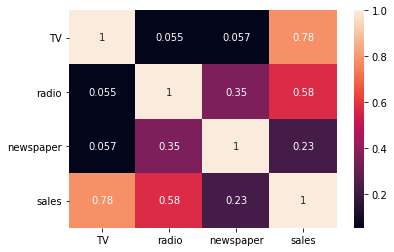

In [47]:
corrMatrix = ads_df.corr() # calculate correlation matrix
print (corrMatrix)
print()

sns.heatmap(corrMatrix, annot=True) # display corrMatrix
plt.show()

Correlation matrix shows:
- high correlation TV to sales by 0.78
- high correlation radio to sales by 0.58
- low correlation newspaper to sales by 0.23 (lower then radio to newspaper)

### Linear regression

In [48]:
def model_to_string(model, labels, precision=2):
    model_str = "{} = ".format(labels[-1])
    for z in range(len(labels) - 1):
        model_str += "{} * {} + ".format(round(model.coef_.flatten()[z], precision), labels[z])
    model_str += "{}".format(round(model.intercept_[0], precision))
    return model_str


def train_linear_model(X, y):
    linear_regression = sk_linear_models.LinearRegression()
    linear_regression.fit(X, y)
    return linear_regression


def get_MSE(model, X, y_true):
    y_predicted = model.predict(X)
    MSE = sk_metrics.mean_squared_error(y_true, y_predicted)
    return MSE

### 3 Sales regression by each ads type


---- 3.1 Tv ads regression ----
sales = 0.05 * TV + 6.77
Train MSE = 9.479876527043968
Test MSE = 13.760219768382665


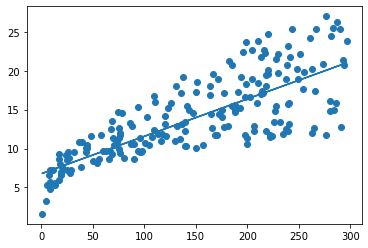


---- 3.2 Radio ads regression ----
sales = 0.22 * radio + 9.06
Train MSE = 17.167894385027456
Test MSE = 21.026361294150796


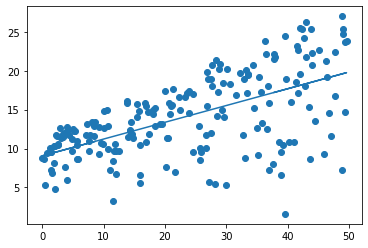


---- 3.3 Newspaper ads regression ----
sales = 0.04 * newspaper + 12.92
Train MSE = 26.266771649178942
Test MSE = 24.372306080282964


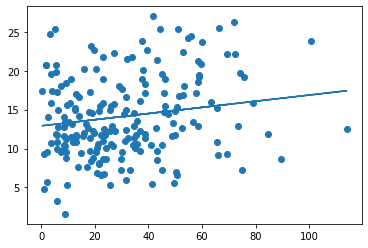

In [51]:
y = ads_df[["sales"]]

ad_types = ads_df.columns.values[:-1]
# print(ad_types)

for i, ad_type in enumerate(ad_types):
    print(f"---- 3.{i+1} {ad_type.capitalize()} ads regression ----")
    X = ads_df[[ad_type]]
    labels =[ad_type,  'sales']

    X_train, X_test, y_train, y_test = sk_model_selection.train_test_split(X, y, shuffle=True)

    linear_regression = train_linear_model(X_train, y_train)
    print(model_to_string(linear_regression, labels))
    print("Train MSE = {}".format(get_MSE(linear_regression, X_train, y_train)))
    print("Test MSE = {}".format(get_MSE(linear_regression, X_test, y_test)))

    regression_line_points = linear_regression.predict(X=X)
    plt.scatter(ads_df[[ad_type]], ads_df[["sales"]])
    plt.plot(X, regression_line_points)

    plt.show()

    print()

### 3.4 Common sales regression

In [56]:
ad_data = ads_df[["TV", "radio", "newspaper"]]
sales_data = ads_df[["sales"]]

linear_regression = train_linear_model(ad_data, sales_data)

labels = ads_df.columns.values
print(model_to_string(linear_regression, labels))

sales = 0.05 * TV + 0.19 * radio + -0.0 * newspaper + 2.94


### 4 Conclusion

Analyzing each type we see that newspapers has the biggest MSE, TV has the smallest and radio near TV

In common analysis newspapepars has zero cofficient so, because of zero result I reccomend stop using newspapers for ads and concetrate on TV with newspapers.